# Final Project: Mining my Food
### By Jenny Yao

Focus on one or more data sets and a particular task (e.g., prediction,
clustering). Compare multiple well-known algorithms/models (those discussed in class) to address this task. Compare their performance. The focus here is more on the data set and the particular task, than on the novelty of the algorithms.

## Classification
**Expected Output:** Based on the features of each recipe, we try to classify recipes into healthy and unhealthy.<br> 
**Expected Input:** All of the input ingredients from each recipes from the csv and/or json files.

*Features:*
- Protein
- Sodium
- Calories
- Fat

*Response/Target:*
- Healthy
- Unhealthy

Classification: 
- Decision Tree
- k-NN
- SVM
- Logistic Regression

## Preprocessing the Data

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster as sk_cluster
from sklearn.feature_extraction import DictVectorizer

%matplotlib inline


### Step 1: Load the Data
In the json file, each recipe is listed with the Category column which has some labels, and one of them is "Healthy". This will be my ground truth.<brk> 80% of the recipes will be used to train the model. 20% will be used for validation.

In [2]:
# Display all columns by reading from the csv file
column_names = ['title', 'rating', 'calories','protein','fat','sodium','wasteless','22-minute meals','3 ingredients','30 days of groceries']
recipe_list = pd.read_csv(r'C:\Users\Jenny\Documents\CSUS Computer Science\Spring 2018\CSC 177\Final Project\epi_r.csv')

In [3]:
recipe_list.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
recipe_list.shape

(20052, 680)

In [5]:
# For all feature columns, we drop the rows that contain NaN within those columns
# if (column_names == ['calories','protein','fat','sodium'
recipe_list.dropna(subset=['calories','protein','fat','sodium'], inplace=True)

In [6]:
recipe_list.shape

(15864, 680)

In [7]:
recipe_list.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Create a link to the JSON file through the filepath
json_link = r'C:\Users\Jenny\Documents\CSUS Computer Science\Spring 2018\CSC 177\Final Project\full_format_recipes.json'
# Load and read the JSON file into a dataframe
recipe_df = pd.read_json(json_link, orient='columns')

In [9]:
filename = r'C:\Users\Jenny\Documents\CSUS Computer Science\Spring 2018\CSC 177\Final Project\recipe_list.csv'

In [10]:
recipe_df.to_csv(filename)

In [11]:
recipe_df.shape

(20130, 11)

In [12]:
recipe_df.head(15)

,calories,categories,date,desc,directions,fat,ingredients,protein,rating,sodium,title
0,426.0,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",2006-09-01 04:00:00,None,"[1. Place the stock, lentils, celery, carrot, ...",7.0,"[4 cups low-sodium vegetable or chicken stock,...",30.0,2.500,559.0,"Lentil, Apple, and Turkey Wrap"
1,403.0,"[Food Processor, Onion, Pork, Bake, Bastille D...",2004-08-20 04:00:00,This uses the same ingredients found in boudin...,[Combine first 9 ingredients in heavy medium s...,23.0,"[1 1/2 cups whipping cream, 2 medium onions, c...",18.0,4.375,1439.0,Boudin Blanc Terrine with Red Onion Confit
2,165.0,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",2004-08-20 04:00:00,None,[In a large heavy saucepan cook diced fennel a...,7.0,"[1 fennel bulb (sometimes called anise), stalk...",6.0,3.750,165.0,Potato and Fennel Soup Hodge
3,NaN,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",2009-03-27 04:00:00,The Sicilian-style tomato sauce has tons of Me...,[Heat oil in heavy large skillet over medium-h...,NaN,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN,5.000,NaN,Mahi-Mahi in Tomato Olive Sauce
4,547.0,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",2004-08-20 04:00:00,None,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,"[1 12-ounce package frozen spinach soufflé, th...",20.0,3.125,452.0,Spinach Noodle Casserole
5,948.0,"[Sandwich, Food Processor, Tomato, Kid-Friendl...",2004-08-20 04:00:00,This recipe can be prepared in 45 minutes or l...,"[Mix basil, mayonnaise and butter in processor...",79.0,[2 1/2 cups (lightly packed) fresh basil leave...,19.0,4.375,1042.0,The Best Blts
6,NaN,"[Salad, Potato, Side, Easter, Low Fat, Quick &...",2004-08-20 04:00:00,Serve this newfangled main-course salad with a...,[Cook potatoes and carrots in large pot of boi...,NaN,"[1 1/2 pounds small red-skinned potatoes, each...",NaN,4.375,NaN,Ham and Spring Vegetable Salad with Shallot Vi...
7,NaN,"[Egg, Fruit, No-Cook, Cocktail Party, Vegetari...",2004-08-20 04:00:00,Pop one of these in your mouth for a burst of ...,[Stir together sugar and chili powder. Whisk e...,NaN,"[6 tablespoons granulated sugar, 1 1/2 tablesp...",NaN,3.750,NaN,Spicy-Sweet Kumquats
8,170.0,"[Beef, Ginger, Sauté, Stir-Fry, Quick & Easy, ...",2004-08-20 04:00:00,Bulgogi,"[Stir together soy sauce, sugar, sesame oil, w...",10.0,"[1/4 cup soy sauce, 1 tablespoon sugar, 2 teas...",7.0,4.375,1272.0,Korean Marinated Beef
9,602.0,"[Salad, Mustard, Potato, Picnic, Lunch, Mayonn...",2008-10-23 22:24:26,Transform your picnic into un pique-nique to r...,[Chop enough parsley leaves to measure 1 table...,41.0,"[6 long parsley sprigs, divided, 1 3/4 cups re...",23.0,3.750,1696.0,Ham Persillade with Mustard Potato Salad and M...


### Step 2: Prune the Data
Remove all recipes where no data info exists in at least one of the features: calories, protein, fat or sodium

In [13]:
recipe_df.dropna(subset=['calories','protein','fat','sodium'], inplace=True)

In [14]:
recipe_df.shape

(15903, 11)

### Step 3: Add new column "Healthy" as the ground truth 

In [15]:
mask = recipe_df.categories.apply(lambda x: 'Healthy' in x)

In [16]:
print(mask)

0        False
1        False
2        False
4        False
5        False
8        False
9        False
10       False
12       False
13       False
14       False
15        True
16       False
17       False
18       False
19       False
20       False
24       False
25       False
26       False
27        True
28       False
29       False
32       False
33       False
35       False
37       False
38       False
39       False
40       False
         ...  
20097    False
20098    False
20099    False
20100    False
20101     True
20102    False
20103    False
20105    False
20106    False
20107    False
20108    False
20109    False
20110    False
20111    False
20112    False
20114    False
20115    False
20116    False
20117    False
20118    False
20119    False
20121    False
20122    False
20123    False
20124    False
20125    False
20126    False
20127    False
20128    False
20129    False
Name: categories, Length: 15903, dtype: bool


In [17]:
recipe_df['Healthy'] = mask

In [18]:
recipe_df.head()

,calories,categories,date,desc,directions,fat,ingredients,protein,rating,sodium,title,Healthy
0,426.0,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",2006-09-01 04:00:00,None,"[1. Place the stock, lentils, celery, carrot, ...",7.0,"[4 cups low-sodium vegetable or chicken stock,...",30.0,2.500,559.0,"Lentil, Apple, and Turkey Wrap",False
1,403.0,"[Food Processor, Onion, Pork, Bake, Bastille D...",2004-08-20 04:00:00,This uses the same ingredients found in boudin...,[Combine first 9 ingredients in heavy medium s...,23.0,"[1 1/2 cups whipping cream, 2 medium onions, c...",18.0,4.375,1439.0,Boudin Blanc Terrine with Red Onion Confit,False
2,165.0,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",2004-08-20 04:00:00,None,[In a large heavy saucepan cook diced fennel a...,7.0,"[1 fennel bulb (sometimes called anise), stalk...",6.0,3.750,165.0,Potato and Fennel Soup Hodge,False
4,547.0,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",2004-08-20 04:00:00,None,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,"[1 12-ounce package frozen spinach soufflé, th...",20.0,3.125,452.0,Spinach Noodle Casserole,False
5,948.0,"[Sandwich, Food Processor, Tomato, Kid-Friendl...",2004-08-20 04:00:00,This recipe can be prepared in 45 minutes or l...,"[Mix basil, mayonnaise and butter in processor...",79.0,[2 1/2 cups (lightly packed) fresh basil leave...,19.0,4.375,1042.0,The Best Blts,False


### Step 4: Convert the ingredients from list to string

In [19]:
recipe_df['ingredients_string'] = recipe_df['ingredients'].apply(' '.join)

In [20]:
recipe_df['ingredients_string'].head(10)

0     4 cups low-sodium vegetable or chicken stock 1...
1     1 1/2 cups whipping cream 2 medium onions, cho...
2     1 fennel bulb (sometimes called anise), stalks...
4     1 12-ounce package frozen spinach soufflé, tha...
5     2 1/2 cups (lightly packed) fresh basil leaves...
8     1/4 cup soy sauce 1 tablespoon sugar 2 teaspoo...
9     6 long parsley sprigs, divided 1 3/4 cups redu...
10    4 teaspoons olive oil 1/2 cup finely chopped s...
12    Nonstick vegetable oil spray 3 cups all-purpos...
13    4 6- to 7-ounce beef tenderloin steaks (each a...
Name: ingredients_string, dtype: object

In [21]:
# Show the title of recipes and what's healthy
short_df = recipe_df.iloc[:,10:12]
short_df

,title,Healthy
0,"Lentil, Apple, and Turkey Wrap",False
1,Boudin Blanc Terrine with Red Onion Confit,False
2,Potato and Fennel Soup Hodge,False
4,Spinach Noodle Casserole,False
5,The Best Blts,False
8,Korean Marinated Beef,False
9,Ham Persillade with Mustard Potato Salad and M...,False
10,"Yams Braised with Cream, Rosemary and Nutmeg",False
12,Banana-Chocolate Chip Cake With Peanut Butter ...,False
13,Beef Tenderloin with Garlic and Brandy,False


In [22]:
short_df.shape

(15903, 2)

In [23]:
recipes = pd.merge(recipe_list, short_df, on='title', how='left')

In [24]:
recipes.shape

(22119, 681)

In [25]:
recipes.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,Healthy
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,False
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
3,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False


In [26]:
recipes.drop(['rating'], axis=1, inplace=True)

In [27]:
recipes.head()

,title,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,Healthy
0,"Lentil, Apple, and Turkey Wrap",426.0,30.0,7.0,559.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,False
1,Boudin Blanc Terrine with Red Onion Confit,403.0,18.0,23.0,1439.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,Potato and Fennel Soup Hodge,165.0,6.0,7.0,165.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
3,Spinach Noodle Casserole,547.0,20.0,32.0,452.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,The Best Blts,948.0,19.0,79.0,1042.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False


In [28]:
# add a row with column totals
recipes.loc['Total']= recipes.sum()
recipes.tail()

,title,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,Healthy
22115,Artichoke and Parmesan Risotto,671.0,22.0,28.0,583.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
22116,Turkey Cream Puff Pie,563.0,31.0,38.0,652.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,False
22117,Snapper on Angel Hair with Citrus Cream,631.0,45.0,24.0,517.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
22118,Baked Ham with Marmalade-Horseradish Glaze,560.0,73.0,10.0,3698.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
Total,"Lentil, Apple, and Turkey Wrap Boudin Blanc Te...",111228968.0,2134218.0,6071323.0,107833964.0,6,1,15,20,7,...,416,1,5,237,2,5,24,16,949,1602


## Feature Extraction

### Step 1: Use the CountVectorizer on the Ingredients

In [29]:
# #Create the vectorized matrix for the ingredients 
# import sklearn.feature_extraction.text as sk_text

# #define an instance of a vectorizer
# vectorizer = sk_text.CountVectorizer(min_df=1, max_df=1.0, max_features=100)

### Step 2: Add additional columns to the matrix for the calories, sodium, fat, and protein

In [30]:
#Add these 4 columns into X, recipe_df['calories','protein','fat','sodium']

In [31]:
#X is the matrix
# X = vectorizer.fit_transform(recipe_df['ingredients']).toarray()

X = recipe_df.as_matrix(columns=['sodium','calories','fat','protein'])
X

array([[  559.,   426.,     7.,    30.],
       [ 1439.,   403.,    23.,    18.],
       [  165.,   165.,     7.,     6.],
       ..., 
       [  652.,   563.,    38.,    31.],
       [  517.,   631.,    24.,    45.],
       [ 3698.,   560.,    10.,    73.]])

In [32]:
#y is the target/feature
y = recipe_df['Healthy'].astype(int)
y

0        0
1        0
2        0
4        0
5        0
8        0
9        0
10       0
12       0
13       0
14       0
15       1
16       0
17       0
18       0
19       0
20       0
24       0
25       0
26       0
27       1
28       0
29       0
32       0
33       0
35       0
37       0
38       0
39       0
40       0
        ..
20097    0
20098    0
20099    0
20100    0
20101    1
20102    0
20103    0
20105    0
20106    0
20107    0
20108    0
20109    0
20110    0
20111    0
20112    0
20114    0
20115    0
20116    0
20117    0
20118    0
20119    0
20121    0
20122    0
20123    0
20124    0
20125    0
20126    0
20127    0
20128    0
20129    0
Name: Healthy, Length: 15903, dtype: int32

## Split the data into training and test set

In [33]:
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [34]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(12722, 4)
(3181, 4)


In [35]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(12722,)
(3181,)


## Apply Models and Calculate the Statistics

### k-NN



In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

# train your model using all data and the best known parameters
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [37]:
from sklearn import metrics

y_pred_knn = knn.predict(X_test)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
#confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred_knn)
confusion

array([[2903,   26],
       [ 246,    6]], dtype=int64)

In [39]:
#recall score
print(metrics.recall_score(y_test, y_pred_knn))

0.0238095238095


In [40]:
#precision score
print(metrics.precision_score(y_test, y_pred_knn))

0.1875


In [41]:
#f1 score
print(metrics.f1_score(y_test, y_pred_knn, average= 'weighted'))

0.882920641074


#### k-NN: ROC Curves and Area Under the Curve (AUC)
Shows how recall (sensitivity) and specificity are affected by various thresholds. Shows how to use the secular and how we use the curve to compare k-NN to different models.

In [42]:
# print the predicted probabilities for class 0 (no) and class 1 (yes)
y_pred_prob = knn.predict_proba(X_test)
y_pred_prob

array([[ 0.8,  0.2],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       ..., 
       [ 0.8,  0.2],
       [ 1. ,  0. ],
       [ 0.8,  0.2]])

In [43]:
# print the predicted probabilities for class 0 and class 1
# give us all the probabilities of healthy recipes
y_pred_prob_class_1 = y_pred_prob[ :, 1]
y_pred_prob_class_1

array([ 0.2,  0. ,  0. , ...,  0.2,  0. ,  0.2])

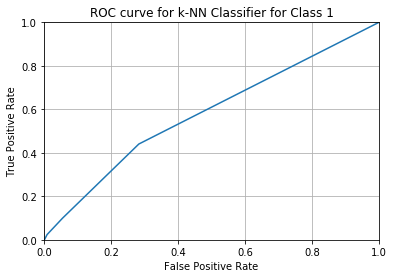

In [44]:
#We use matplotlib to get a ROC curve for the classifier
%matplotlib inline
import matplotlib.pyplot as plt
# call roc_curve using the matrix, then we use the ground truth y_test
#we plot these 2 vectors fpr and tpr
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_class_1)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for k-NN Classifier for Class 1')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

Using the ground truth to get the probability of that class to get the AUC, which is the __percentage__ of the area that is _under the curve_

In [45]:
print(metrics.roc_auc_score(y_test, y_pred_prob_class_1))

0.580857408401


### Decision Tree

In [46]:
from sklearn import tree 
#train the model on the training set

clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, y_train)

In [47]:
from sklearn import metrics
#make predictions on the testing set
y_pred_tree = clf_tree.predict(X_test)
y_pred_tree

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
#confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred_tree)
confusion

array([[2739,  190],
       [ 203,   49]], dtype=int64)

In [49]:
#recall score
print(metrics.recall_score(y_test, y_pred_tree))

0.194444444444


In [50]:
#precision score
print(metrics.precision_score(y_test, y_pred_tree))

0.205020920502


In [51]:
#f1 score
print(metrics.f1_score(y_test, y_pred_tree, average= 'weighted'))

0.874955189278


#### Decision Tree: ROC Curves and Area Under the Curve (AUC)
Shows how recall (sensitivity) and specificity are affected by various thresholds. Shows how to use the secular and how we use the curve to compare the Decision Tree to different models.

In [52]:
# print the predicted probabilities for class 0 (no) and class 1 (yes)
y_pred_prob = clf_tree.predict_proba(X_test)
y_pred_prob

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [53]:
# print the predicted probabilities for class 0 and class 1
# give us all the probabilities of healthy recipes
y_pred_prob_class_1 = y_pred_prob[ :, 1]
y_pred_prob_class_1

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

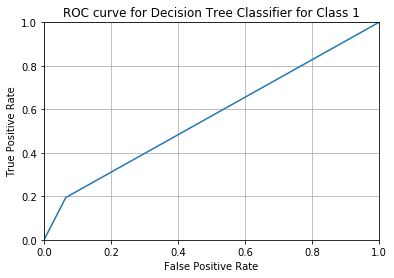

In [54]:
#We use matplotlib to get a ROC curve for the classifier
%matplotlib inline
import matplotlib.pyplot as plt
# call roc_curve using the matrix, then we use the ground truth y_test
#we plot these 2 vectors fpr and tpr
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_class_1)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Decision Tree Classifier for Class 1')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

Using the ground truth to get the probability of that class to get the AUC, which is the __percentage__ of the area that is _under the curve_

In [55]:
print(metrics.roc_auc_score(y_test, y_pred_prob_class_1))

0.564787944312


### SVM

In [56]:
from sklearn.svm import SVC
#train the model on the training set

clf_svm = SVC(probability=True)   #enable probability
clf_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [57]:
from sklearn import metrics
#make predictions on the testing set
y_pred_svm = clf_svm.predict(X_test)
y_pred_svm

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
#confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred_svm)
confusion

array([[2929,    0],
       [ 232,   20]], dtype=int64)

In [59]:
#recall score
print(metrics.recall_score(y_test, y_pred_svm))

0.0793650793651


In [60]:
#precision score
print(metrics.precision_score(y_test, y_pred_svm))

1.0


In [61]:
#f1 score
print(metrics.f1_score(y_test, y_pred_svm, average= 'weighted'))

0.897352364398


#### SVM: ROC Curves and Area Under the Curve (AUC)
Shows how recall (sensitivity) and specificity are affected by various thresholds. Shows how to use the secular and how we use the curve to compare SVM to different models.

In [62]:
# print the predicted probabilities for class 0 (no) and class 1 (yes)
y_pred_prob = clf_svm.predict_proba(X_test)
y_pred_prob

array([[ 0.92476354,  0.07523646],
       [ 0.92476354,  0.07523646],
       [ 0.92476354,  0.07523646],
       ..., 
       [ 0.92664516,  0.07335484],
       [ 0.92476354,  0.07523646],
       [ 0.92476357,  0.07523643]])

In [63]:
# print the predicted probabilities for class 0 and class 1
# give us all the probabilities of healthy recipes
y_pred_prob_class_1 = y_pred_prob[ :, 1]
y_pred_prob_class_1

array([ 0.07523646,  0.07523646,  0.07523646, ...,  0.07335484,
        0.07523646,  0.07523643])

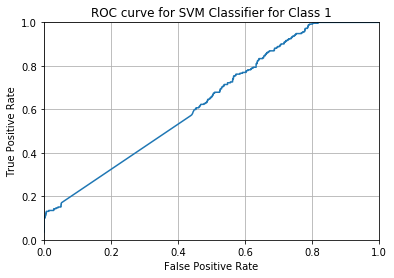

In [64]:
#We use matplotlib to get a ROC curve for the classifier
%matplotlib inline
import matplotlib.pyplot as plt
# call roc_curve using the matrix, then we use the ground truth y_test
#we plot these 2 vectors fpr and tpr
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_class_1)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for SVM Classifier for Class 1')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

Using the ground truth to get the probability of that class to get the AUC, which is the __percentage__ of the area that is _under the curve_

In [65]:
print(metrics.roc_auc_score(y_test, y_pred_prob_class_1))

0.637613330299


### Logistic Regression

In [66]:
from sklearn import linear_model
#train the model on the training set

clf_lr = linear_model.LogisticRegression()
clf_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
from sklearn import metrics
#make predictions on the testing set
y_pred_lr = clf_lr.predict(X_test)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0])

In [68]:
#confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred_lr)
confusion

array([[2929,    0],
       [ 252,    0]], dtype=int64)

In [69]:
#recall score
print(metrics.recall_score(y_test, y_pred_lr))

0.0


In [70]:
#precision score
print(metrics.precision_score(y_test, y_pred_lr))

0.0


C:\Users\Jenny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [71]:
#f1 score
print(metrics.f1_score(y_test, y_pred_lr, average= 'weighted'))

0.882803120615


C:\Users\Jenny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Logistic Regression: ROC Curves and Area Under the Curve (AUC)
Shows how recall (sensitivity) and specificity are affected by various thresholds. Shows how to use the secular and how we use the curve to compare the Logistic Regression to different models.

In [72]:
# print the predicted probabilities for class 0 (no) and class 1 (yes)
y_pred_prob = clf_lr.predict_proba(X_test)
y_pred_prob

C:\Users\Jenny\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


array([[ 0.91451574,  0.08548426],
       [ 0.99435928,  0.00564072],
       [ 0.95985103,  0.04014897],
       ..., 
       [ 0.87298164,  0.12701836],
       [ 0.93644612,  0.06355388],
       [ 0.93274916,  0.06725084]])

In [73]:
# print the predicted probabilities for class 0 and class 1
# give us all the probabilities of healthy recipes
y_pred_prob_class_1 = y_pred_prob[ :, 1]
y_pred_prob_class_1

array([ 0.08548426,  0.00564072,  0.04014897, ...,  0.12701836,
        0.06355388,  0.06725084])

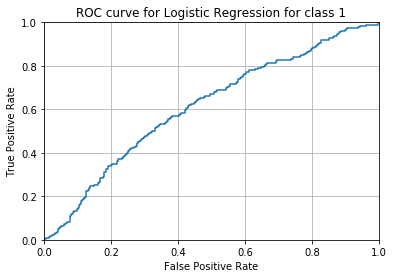

In [74]:
#We use matplotlib to get a ROC curve for the classifier
%matplotlib inline
import matplotlib.pyplot as plt
# call roc_curve using the matrix, then we use the ground truth y_test
#we plot these 2 vectors fpr and tpr
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_class_1)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Logistic Regression for class 1')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

Using the ground truth to get the probability of that class to get the AUC, which is the __percentage__ of the area that is _under the curve_

In [75]:
print(metrics.roc_auc_score(y_test, y_pred_prob_class_1))

0.61170045576


## After model comparison, which is best?

After looking at the F-measure of each algorithm and the AUC Scores, the best model is: SVM

F1 Score: 0.897 <br>
AUC Score: 0.638